In [ ]:
import gzip
import json
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_curve, auc, roc_auc_score,precision_recall_curve
import matplotlib.pyplot as plt

In [ ]:
with open('data_parser.py', 'r') as file:
    script_content = file.read()
    print(script_content)

# -*- coding: utf-8 -*-
"""data_parser.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1Uj7GMRGTEA9U00DFG7e3FSh4UL-cwGpJ
"""

import gzip
import json
import pandas as pd


import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd


class DataParser:

   def __init__(self, data, label_data = ""):
       self.path_to_data = data
       self.label_data = label_data


   def full_parse(self):
       dictionary = eval(str(self.pull_data_into_dict()))
       df = self.data_to_df(dictionary)
       return df


   def parse_without_labels(self):
       dictionary = eval(str(self.pull_data_into_dict()))
       df = self.data_to_df_no_labels(dictionary)
       return df

   def data_to_df(self, dictionary):
       rows = []
       for key, value in dictionary.items():
           row = {
               'transcript_id': key[0],
               'transcript_position': key[1],
               'first5': value

In [ ]:
from data_parser import DataParser as DataParser


#If you want to parse with labels
parser = DataParser("dataset0.json.gz","data.info.labelled")
train_df = parser.full_parse()


# If parsing without labels
#parser = DataParser('dataset1.json.gz')
#df = parser.parse_without_labels()


1000/121838
2000/121838
3000/121838
4000/121838
5000/121838
6000/121838
7000/121838
8000/121838
9000/121838
10000/121838
11000/121838
12000/121838
13000/121838
14000/121838
15000/121838
16000/121838
17000/121838
18000/121838
19000/121838
20000/121838
21000/121838
22000/121838
23000/121838
24000/121838
25000/121838
26000/121838
27000/121838
28000/121838
29000/121838
30000/121838
31000/121838
32000/121838
33000/121838
34000/121838
35000/121838
36000/121838
37000/121838
38000/121838
39000/121838
40000/121838
41000/121838
42000/121838
43000/121838
44000/121838
45000/121838
46000/121838
47000/121838
48000/121838
49000/121838
50000/121838
51000/121838
52000/121838
53000/121838
54000/121838
55000/121838
56000/121838
57000/121838
58000/121838
59000/121838
60000/121838
61000/121838
62000/121838
63000/121838
64000/121838
65000/121838
66000/121838
67000/121838
68000/121838


KeyboardInterrupt: 

In [ ]:
label_data = pd.read_csv('data.info.labelled')

# Assume label_data is your original DataFrame containing 'gene_id'
unique_gene_ids = label_data['gene_id'].unique()
train_gene_ids, test_gene_ids = train_test_split(unique_gene_ids, test_size=0.2, random_state=42)

# Create train and test datasets
train_data = label_data[label_data['gene_id'].isin(train_gene_ids)]
test_data = label_data[label_data['gene_id'].isin(test_gene_ids)]

# Check if a specific gene_id is in the test set
specific_gene_id = test_gene_ids[0]
filtered_rows = test_data[test_data['gene_id'] == specific_gene_id]
print(filtered_rows)

# Create a mapping from transcript_id to gene_id
transcript_to_gene = label_data.set_index('transcript_id')['gene_id'].to_dict()

# Create train and test DataFrames instead of dictionaries
train_df2 = pd.DataFrame(columns=train_df.columns)
test_df = pd.DataFrame(columns=train_df.columns)

# Iterate over the DataFrame instead of the dictionary
for index, row in train_df.iterrows():
    transcript_id = row['transcript_id']
    transcript_position = row['transcript_position']  # Assuming 'transcript_position' exists in your DataFrame
    gene_id = transcript_to_gene.get(transcript_id)

    # Create a tuple key for easier checking
    key = (transcript_id, transcript_position)

    # If the gene_id is in the train set, add to train_df
    if gene_id in train_gene_ids:
        train_df2 = pd.concat([train_df2, row.to_frame().T], ignore_index=True)
    # If the gene_id is in the test set, add to test_df
    elif gene_id in test_gene_ids:
        test_df = pd.concat([test_df, row.to_frame().T], ignore_index=True)

# Check if a specific key is in the train DataFrame
key_to_check = ('ENST00000344843', '228')  # Adjust this to match your actual DataFrame structure
key_in_train = train_df2[(train_df2['transcript_id'] == key_to_check[0]) &
                         (train_df2['transcript_position'] == key_to_check[1])].shape[0] > 0
print(key_in_train)


               gene_id    transcript_id  transcript_position  label
90592  ENSG00000118640  ENST00000409760                   52      0
90593  ENSG00000118640  ENST00000409760                   97      0
90594  ENSG00000118640  ENST00000409760                  135      0
90595  ENSG00000118640  ENST00000409760                  172      0
90596  ENSG00000118640  ENST00000409760                  179      0
90597  ENSG00000118640  ENST00000409760                  195      0
90598  ENSG00000118640  ENST00000409760                  500      0
90599  ENSG00000118640  ENST00000409760                  529      0
True


In [ ]:
train_data.loc[:,'transcript_position'] = train_data['transcript_position'].astype('int64')
train_data.loc[:, 'transcript_id'] = train_data['transcript_id'].astype(str)
train_data.loc[:,'transcript_position'] = train_data['transcript_position'].astype(str)

test_data.loc[:,'transcript_position'] = test_data['transcript_position'].astype('int64')
test_data.loc[:,'transcript_id'] = test_data['transcript_id'].astype(str)
test_data.loc[:,'transcript_position'] = test_data['transcript_position'].astype(str)

train_df2['transcript_id'] = train_df2['transcript_id'].astype(str)
train_df2['transcript_position'] = train_df2['transcript_position'].astype(str)

#inner join
merged_train_df = train_data.merge(train_df, on=['transcript_id', 'transcript_position'], how='inner')
merged_test_df = test_data.merge(train_df, on=['transcript_id', 'transcript_position'], how='inner')

#extract labels
merged_train_df_labels = merged_train_df['label_y']
merged_test_df_labels = merged_test_df['label_y']
merged_train_df_labels = merged_train_df_labels.astype(int)
merged_test_df_labels = merged_test_df_labels.astype(int)

merged_train_df = merged_train_df.drop(columns=['label_x', 'label_y'])
merged_test_df = merged_test_df.drop(columns=['label_x', 'label_y'])


In [ ]:
#classifer
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(merged_train_df.drop(columns=['gene_id', 'transcript_id', 'transcript_position', 'first5', 'second5', 'third5']), merged_train_df_labels)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(merged_test_df.drop(columns=['gene_id', 'transcript_id', 'transcript_position', 'first5', 'second5', 'third5']))
accuracy = accuracy_score(merged_test_df_labels, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(merged_test_df_labels, y_pred)
print("Precision:", precision)
recall = recall_score(merged_test_df_labels, y_pred)
print("Recall:", recall)
score = rf_classifier.predict_proba(merged_test_df.drop(columns=['gene_id', 'transcript_id', 'transcript_position', 'first5', 'second5', 'third5']))[:, 1]

Accuracy: 0.9647185887435498
Precision: 0.6773255813953488
Recall: 0.23207171314741035


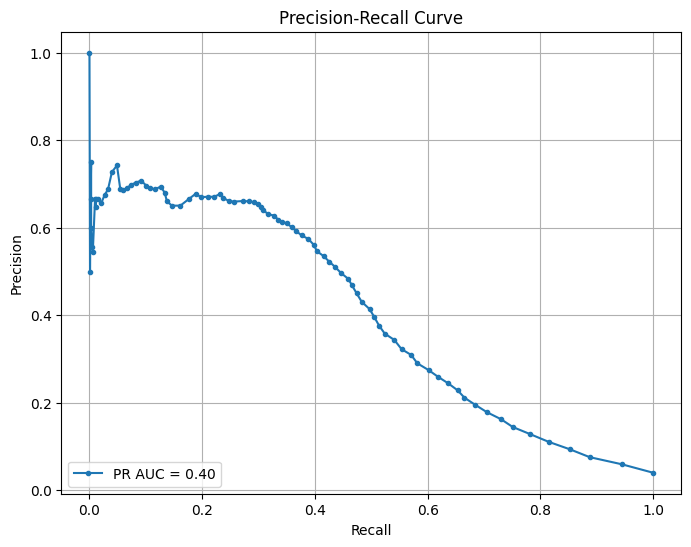

Precision-Recall AUC: 0.3978183969063704


In [ ]:
precision, recall, _ = precision_recall_curve(merged_test_df_labels, score)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.2f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()
plt.show()
print("Precision-Recall AUC:" ,pr_auc)

# data0

In [ ]:
#dataset0
parser = DataParser('dataset0.json.gz')
data0 = parser.parse_without_labels()

1000/121838
2000/121838
3000/121838
4000/121838
5000/121838
6000/121838
7000/121838
8000/121838
9000/121838
10000/121838
11000/121838
12000/121838
13000/121838
14000/121838
15000/121838
16000/121838
17000/121838
18000/121838
19000/121838
20000/121838
21000/121838
22000/121838
23000/121838
24000/121838
25000/121838
26000/121838
27000/121838
28000/121838
29000/121838
30000/121838
31000/121838
32000/121838
33000/121838
34000/121838
35000/121838
36000/121838
37000/121838
38000/121838
39000/121838
40000/121838
41000/121838
42000/121838
43000/121838
44000/121838
45000/121838
46000/121838
47000/121838
48000/121838
49000/121838
50000/121838
51000/121838
52000/121838
53000/121838
54000/121838
55000/121838
56000/121838
57000/121838
58000/121838
59000/121838
60000/121838
61000/121838
62000/121838
63000/121838
64000/121838
65000/121838
66000/121838
67000/121838
68000/121838
69000/121838
70000/121838
71000/121838
72000/121838
73000/121838
74000/121838
75000/121838
76000/121838
77000/121838
78000/12

In [ ]:
score0 = rf_classifier.predict_proba(data0.drop(columns=['transcript_id', 'transcript_position', 'first5', 'second5', 'third5']))[:, 1]
data0['score'] = score0

In [ ]:
output_data0 = data0[['transcript_id', 'transcript_position', 'score']]

In [ ]:
output_data0.to_csv('helix_dataset0_2.csv', index = False)

# Dataset1

In [ ]:
#dataset1
parser = DataParser('dataset1.json.gz')
data1 = parser.parse_without_labels()

1000/90810
2000/90810
3000/90810
4000/90810
5000/90810
6000/90810
7000/90810
8000/90810
9000/90810
10000/90810
11000/90810
12000/90810
13000/90810
14000/90810
15000/90810
16000/90810
17000/90810
18000/90810
19000/90810
20000/90810
21000/90810
22000/90810
23000/90810
24000/90810
25000/90810
26000/90810
27000/90810
28000/90810
29000/90810
30000/90810
31000/90810
32000/90810
33000/90810
34000/90810
35000/90810
36000/90810
37000/90810
38000/90810
39000/90810
40000/90810
41000/90810
42000/90810
43000/90810
44000/90810
45000/90810
46000/90810
47000/90810
48000/90810
49000/90810
50000/90810
51000/90810
52000/90810
53000/90810
54000/90810
55000/90810
56000/90810
57000/90810
58000/90810
59000/90810
60000/90810
61000/90810
62000/90810
63000/90810
64000/90810
65000/90810
66000/90810
67000/90810
68000/90810
69000/90810
70000/90810
71000/90810
72000/90810
73000/90810
74000/90810
75000/90810
76000/90810
77000/90810
78000/90810
79000/90810
80000/90810
81000/90810
82000/90810
83000/90810
84000/90810
8

In [ ]:
score1 = rf_classifier.predict_proba(data1.drop(columns=['transcript_id', 'transcript_position', 'first5', 'second5', 'third5']))[:, 1]
data1['score'] = score1

In [ ]:
output_data1 = data1[['transcript_id', 'transcript_position', 'score']]

In [ ]:
output_data1.to_csv('helix_dataset1_2.csv', index = False)

# Dataset2

In [ ]:
parser = DataParser('dataset2.json.gz')
data2 = parser.parse_without_labels()

1000/1323


In [ ]:
score2 = rf_classifier.predict_proba(data2.drop(columns=['transcript_id', 'transcript_position', 'first5', 'second5', 'third5']))[:, 1]
data2['score'] = score2

In [ ]:
output_data2 = data2[['transcript_id', 'transcript_position', 'score']]

In [ ]:
output_data2.to_csv('helix_dataset2_2.csv', index = False)